In [113]:
import os 
os.environ["TRANSFORMERS_NO_TF"] = "1"
os.environ["TRANSFORMERS_NO_FLAX"] = "1"
import numpy as np 
import pandas as pd 
from Extract import LabelSimilar 
from Extract import Extract 
from numpy.dtypes import StringDType
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import time 
import torch 
import statsmodels.api as sm 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from statsmodels.iolib.summary2 import summary_col

In [114]:
# Opening the data frame 
sentiment_data = pd.read_csv('final_data/senti_data.csv').drop(columns='Unnamed: 0')
# setting up initial data frame 
data_path = "1430_data/speeches.csv"
# putting it into dataframe 
speeches = pd.read_csv(data_path)
speeches
sentiment_data


outlier = sentiment_data.loc[(sentiment_data['one_month_10y']<=-1 )& (sentiment_data['one_month_10y']<=1)]
sentiment_data= sentiment_data.drop(index= outlier.index)
sentiment_data = sentiment_data[np.abs(sentiment_data['six_month_10y']) <1]
sentiment_data = sentiment_data[np.abs(sentiment_data['three_month_10y']) <1]
sentiment_data = sentiment_data[np.abs(sentiment_data['one_month_3m_ib']) <1]
sentiment_data = sentiment_data[np.abs(sentiment_data['twelve_month_10y']) <1]
sentiment_data = sentiment_data[np.abs(sentiment_data['six_month_10y']) <1]
sentiment_data = sentiment_data[np.abs(sentiment_data['twelve_month_3m_ib']) <1]
sentiment_data




,Inflation,Domestic Growth,Trade Balance,Value of Currency,date,country,one_month_10y,three_month_10y,six_month_10y,twelve_month_10y,one_month_3m_ib,two_month_3m_ib,three_month_3m_ib,six_month_3m_ib,twelve_month_3m_ib
0,16.204588,16.079428,20.593807,13.284071,2015-07-22,australia,-0.062971,-0.090691,-0.073238,-0.337440,0.000000,0.014019,0.004673,0.074766,-0.098131
1,17.552602,7.687599,17.293699,12.536172,2006-07-04,united states,-0.041470,-0.070457,-0.064467,-0.016357,-0.007435,-0.009294,-0.011152,-0.013011,0.020446
2,16.226379,17.836803,15.999983,15.829628,2018-04-30,united kingdom,-0.006089,-0.090614,0.023431,-0.211941,-0.149070,-0.155509,-0.013355,0.065967,0.084240
3,21.555844,16.922079,14.482428,19.547964,2003-07-24,japan,0.470711,0.503138,0.391213,0.891213,0.023529,0.047059,0.035294,-0.164706,-0.364706
4,14.414970,14.257597,15.157469,13.895609,2008-07-02,united states,-0.030444,-0.048316,-0.371838,-0.111149,0.286738,0.548387,-0.154122,-0.584229,-0.892473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7713,14.671232,16.520494,16.771943,14.096919,1995-11-30,australia,-0.028283,-0.029009,0.039691,-0.157544,-0.004021,0.000000,0.001340,0.012064,-0.135389
7714,12.477736,18.960229,15.383604,13.046171,2001-05-24,united states,-0.019861,-0.077913,-0.137231,-0.042071,-0.021390,-0.069519,-0.232620,-0.510695,-0.516043
7715,16.520803,18.086988,16.642796,14.843251,1997-05-03,united states,-0.032356,-0.061449,-0.124565,-0.157720,-0.010601,-0.010601,-0.010601,0.024735,-0.010601
7716,13.821925,18.615942,17.572251,15.752740,2010-04-21,japan,-0.022551,-0.164075,-0.297823,-0.055210,0.000000,0.000000,0.000000,0.000000,-0.644970


In [115]:
data = sentiment_data
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=0,how='any')

y = data.iloc[:, 6:]
x = (data.iloc[:,0:4])
x = sm.add_constant(x)

print(data.iloc[:,0:4].describe().to_latex())

\begin{tabular}{lrrrr}
\toprule
 & Inflation & Domestic Growth & Trade Balance & Value of Currency \\
\midrule
count & 5797.000000 & 5797.000000 & 5797.000000 & 5797.000000 \\
mean & 15.968372 & 17.259118 & 16.769701 & 15.868556 \\
std & 1.773048 & 2.270728 & 2.094848 & 2.102164 \\
min & 4.876917 & 5.417383 & 6.682375 & 4.772609 \\
25% & 14.871137 & 15.805927 & 15.621077 & 14.649099 \\
50% & 15.922433 & 17.092604 & 16.697930 & 15.926356 \\
75% & 16.931645 & 18.484864 & 17.803231 & 17.088057 \\
max & 28.762434 & 28.419263 & 28.626338 & 28.660192 \\
\bottomrule
\end{tabular}



In [116]:
regs = []
for i in range(0, len(y.columns)):
    yvar = (y[y.columns[i]])
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)


In [117]:
# Displaying our regression results as a table and in a latex table
print(summary_col([regs[3], regs[6]],stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =[y.columns.to_list()[3], y.columns[6]]).as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                  & twelve\_month\_10y & three\_month\_3m\_ib  \\
\hline
const             & -0.0792959*        & -0.1188863***         \\
                  & (0.0434053)        & (0.0309258)           \\
Inflation         & -0.0031773         & -0.0006341            \\
                  & (0.0021990)        & (0.0015667)           \\
Domestic Growth   & -0.0019400         & 0.0030601**           \\
                  & (0.0017711)        & (0.0012619)           \\
Trade Balance     & 0.0009164          & 0.0000049             \\
                  & (0.0018779)        & (0.0013380)           \\
Value of Currency & 0.0044085**        & 0.0032943**           \\
                  & (0.0018437)        & (0.0013136)           \\
R-squared         & 0.0013696          & 0.0029934             \\
R-squared Adj.    & 0.0006800          & 0.0023048             \\
N                 & 5797               & 5797             

Text(0.5, 0, 'Sentiment for Domestic Growth')

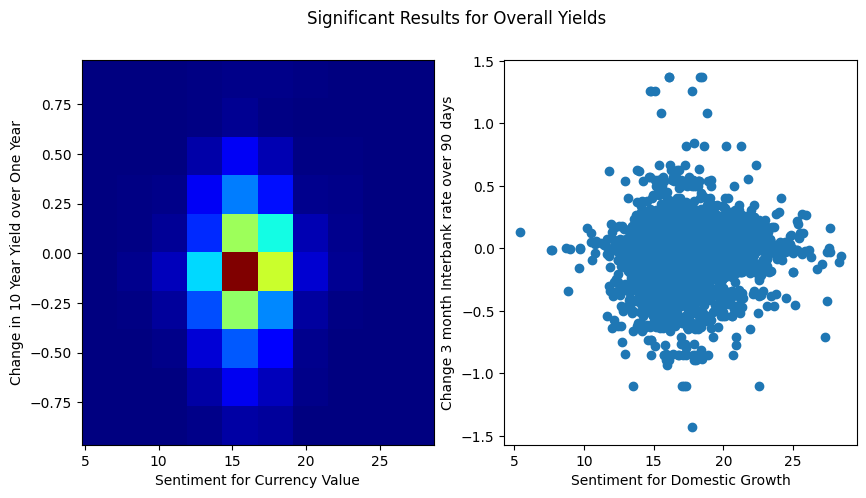

In [118]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
fig.suptitle("Significant Results for Overall Yields")
axs[0].hist2d(x['Value of Currency'],y['twelve_month_10y'],  cmap=plt.cm.jet)
axs[0].set_xlabel("Sentiment for Currency Value")
axs[0].set_ylabel("Change in 10 Year Yield over One Year")
axs[1].scatter( x['Domestic Growth'],y['three_month_3m_ib'])
axs[1].set_ylabel("Change 3 month Interbank rate over 90 days")
axs[1].set_xlabel("Sentiment for Domestic Growth")

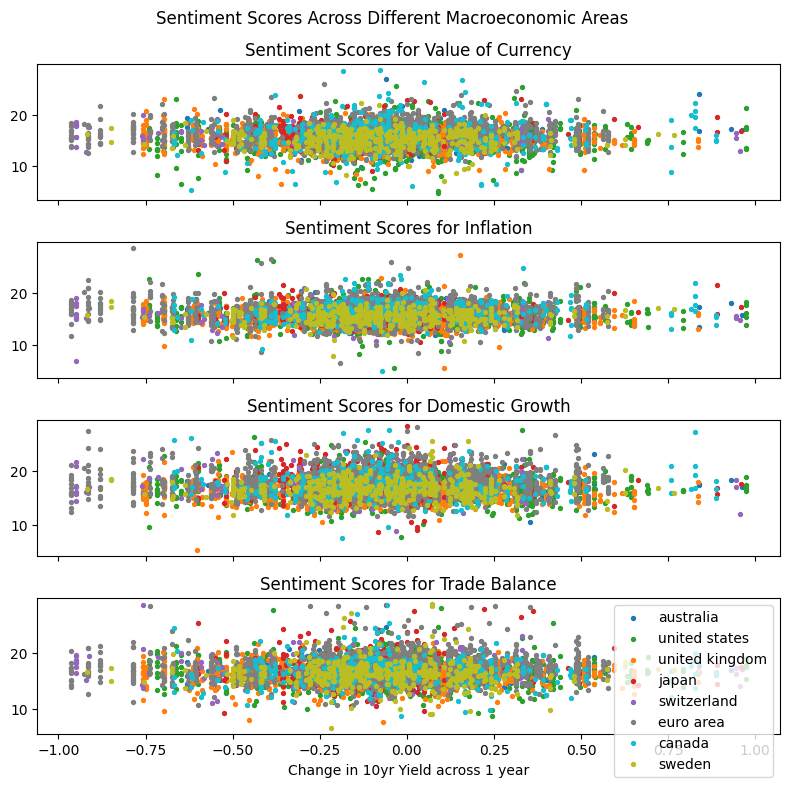

In [119]:
fig, ax = plt.subplots(4, sharex=True)
fig.set_size_inches((8,8))
labels = ['Value of Currency', 'Inflation', 'Domestic Growth', 'Trade Balance']
colors = ['tab:blue', 'tab:green','tab:orange', 'tab:red', 'tab:purple','tab:gray', 'tab:cyan','tab:olive']
counts = data['country'].unique()
i =0
for i in range(0,4):
    for nation,color in zip(counts,colors):
        data_sub = data[data['country']==nation]
        ax[i].set_title(f'Sentiment Scores for {labels[i]}')
        ax[i].scatter(x=data_sub['twelve_month_10y'], y = data_sub[labels[i]],color=color, label=nation, s=8 )
ax[3].legend()
ax[3].set_xlabel("Change in 10yr Yield across 1 year")
fig.suptitle("Sentiment Scores Across Different Macroeconomic Areas ")
fig.tight_layout()



In [120]:
# Regression by country 
country = sentiment_data['country'].unique()
dfs =[]
for nation in country:
    country_df = data[data['country']==nation].reset_index(drop=True)
    dfs.append(country_df)
dfs[1]

,Inflation,Domestic Growth,Trade Balance,Value of Currency,date,country,one_month_10y,three_month_10y,six_month_10y,twelve_month_10y,one_month_3m_ib,two_month_3m_ib,three_month_3m_ib,six_month_3m_ib,twelve_month_3m_ib
0,17.552602,7.687599,17.293699,12.536172,2006-07-04,united states,-0.041470,-0.070457,-0.064467,-0.016357,-0.007435,-0.009294,-0.011152,-0.013011,0.020446
1,14.414970,14.257597,15.157469,13.895609,2008-07-02,united states,-0.030444,-0.048316,-0.371838,-0.111149,0.286738,0.548387,-0.154122,-0.584229,-0.892473
2,17.583598,19.876066,17.744428,12.534370,2010-05-06,united states,-0.063131,-0.210925,-0.192105,-0.073517,-0.211538,-0.384615,-0.461538,-0.423077,-0.576923
3,17.151369,15.104854,17.749441,11.136756,2006-05-16,united states,-0.000712,-0.045690,-0.100736,-0.071162,0.020561,0.005607,-0.001869,-0.005607,-0.003738
4,16.502498,16.006923,16.545366,17.258094,2011-03-23,united states,0.011906,-0.120689,-0.421489,-0.363648,-0.086957,-0.043478,0.043478,0.608696,0.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,15.565255,16.270301,16.580341,17.051423,2011-01-08,united states,0.053717,0.017973,-0.115203,-0.420595,0.000000,-0.178571,-0.250000,0.035714,0.071429
1193,13.643909,13.679077,15.683369,15.349705,2005-05-27,united states,-0.035254,0.028551,0.094278,0.233023,0.056213,0.115385,0.144970,0.316568,0.582840
1194,21.298658,17.712372,15.895365,17.974667,2012-10-11,united states,-0.052795,0.096537,0.007388,0.498066,0.043478,0.000000,-0.043478,-0.130435,-0.478261
1195,12.477736,18.960229,15.383604,13.046171,2001-05-24,united states,-0.019861,-0.077913,-0.137231,-0.042071,-0.021390,-0.069519,-0.232620,-0.510695,-0.516043


In [121]:
# Results for US 
us = dfs[1]
x = us.iloc[:,0:4]
y = us.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = us[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col(regs[6],stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names ='3 Month Interbank Yields US').as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                  & 3 I          \\
\hline
Inflation         & -0.0033036   \\
                  & (0.0037422)  \\
Domestic Growth   & 0.0009442    \\
                  & (0.0034386)  \\
Trade Balance     & -0.0065453*  \\
                  & (0.0034801)  \\
Value of Currency & 0.0076027**  \\
                  & (0.0030968)  \\
R-squared         & 0.0190562    \\
R-squared Adj.    & 0.0157672    \\
N                 & 1197         \\
\hline
\end{tabular}
\end{center}
\end{table}
\bigskip
Standard errors in parentheses. \newline 
* p<.1, ** p<.05, ***p<.01


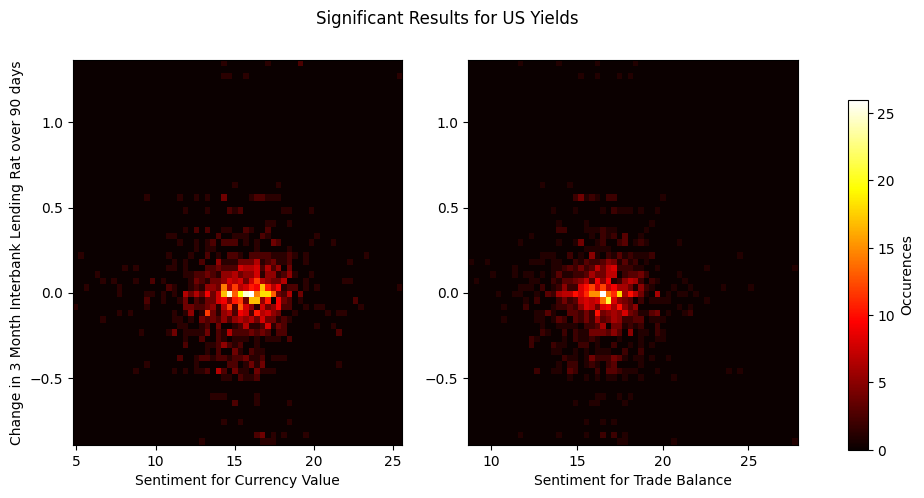

In [122]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.suptitle("Significant Results for US Yields")

axs[0].hist2d(us['Value of Currency'],us['three_month_3m_ib'], bins=60, cmap='hot')
axs[0].set_xlabel("Sentiment for Currency Value")

axs[0].set_ylabel("Change in 3 Month Interbank Lending Rat over 90 days")
a = axs[1].hist2d( us['Trade Balance'],us['three_month_3m_ib'],bins=60, cmap='hot')
axs[1].set_xlabel("Sentiment for Trade Balance")
fig.set_facecolor("white")
fig.subplots_adjust(right = 0.85)
fig.colorbar(a[3],cax, label='Occurences')


In [123]:
# Results for UK 
uk = dfs[2]
x = uk.iloc[:,0:4]
x = sm.add_constant(x)
y = uk.iloc[:, 6:]
regs = []

for i in range(0, len(y.columns)):
    yvar = uk[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col([regs[6], regs[8]],stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =[y.columns.to_list()[6],y.columns.to_list()[8]]).as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                  & three\_month\_3m\_ib & twelve\_month\_3m\_ib  \\
\hline
const             & -0.2154094***        & -0.3029285*            \\
                  & (0.0616503)          & (0.1600515)            \\
Inflation         & -0.0011989           & -0.0124140             \\
                  & (0.0031554)          & (0.0081917)            \\
Domestic Growth   & 0.0053196*           & 0.0210618***           \\
                  & (0.0027185)          & (0.0070575)            \\
Trade Balance     & 0.0024091            & 0.0087733              \\
                  & (0.0029157)          & (0.0075695)            \\
Value of Currency & 0.0052402**          & -0.0056160             \\
                  & (0.0026549)          & (0.0068923)            \\
R-squared         & 0.0130660            & 0.0123427              \\
R-squared Adj.    & 0.0092032            & 0.0084771              \\
N                 &

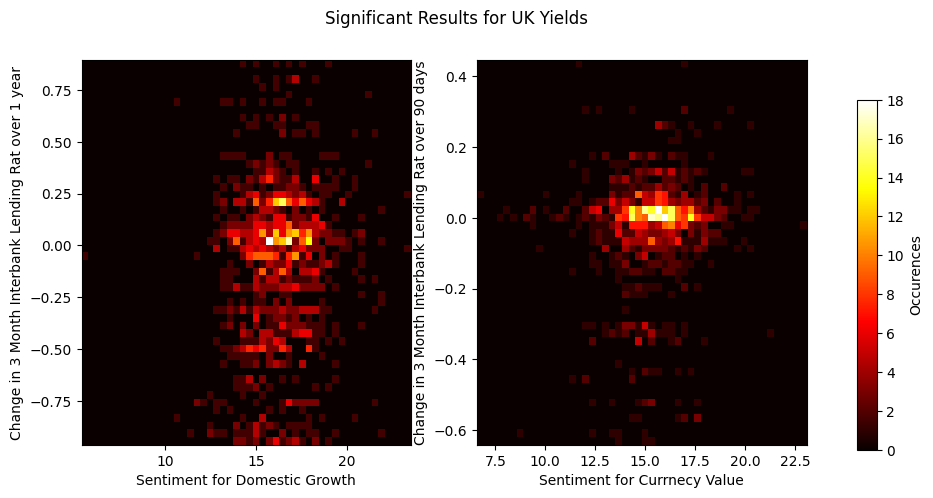

In [124]:
fig, axs = plt.subplots(1,2)
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.set_size_inches((10,5))
fig.suptitle("Significant Results for UK Yields")
axs[0].hist2d(uk['Domestic Growth'],uk['twelve_month_3m_ib'], bins=50, cmap='hot')
axs[0].set_xlabel("Sentiment for Domestic Growth")
axs[0].set_ylabel("Change in 3 Month Interbank Lending Rat over 1 year")
a = axs[1].hist2d( uk['Value of Currency'],uk['three_month_3m_ib'], bins=50, cmap='hot' )
axs[1].set_xlabel("Sentiment for Currnecy Value")
axs[1].set_ylabel("Change in 3 Month Interbank Lending Rat over 90 days")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label = 'Occurences')

In [125]:
# Results for Japan

japan = dfs[3]
x = japan.iloc[:,0:4]
y = japan.iloc[:, 6:]
x = sm.add_constant(x)
regs = []
for i in range(0, len(y.columns)):
    yvar = japan[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col([regs[3], regs[7]],stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =[y.columns.to_list()[3],y.columns.to_list()[7]]).as_latex())


\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                  & twelve\_month\_10y & six\_month\_3m\_ib  \\
\hline
const             & -0.3170747***      & 0.1433929           \\
                  & (0.1161748)        & (0.1587041)         \\
Inflation         & 0.0065926          & 0.0008019           \\
                  & (0.0068082)        & (0.0093005)         \\
Domestic Growth   & -0.0057537         & -0.0229586***       \\
                  & (0.0046305)        & (0.0063256)         \\
Trade Balance     & 0.0027518          & -0.0033759          \\
                  & (0.0044663)        & (0.0061013)         \\
Value of Currency & 0.0096077*         & 0.0129599*          \\
                  & (0.0057144)        & (0.0078063)         \\
R-squared         & 0.0135012          & 0.0460174           \\
R-squared Adj.    & 0.0038768          & 0.0367103           \\
N                 & 415                & 415                 \\
\hline
\end{tabular}

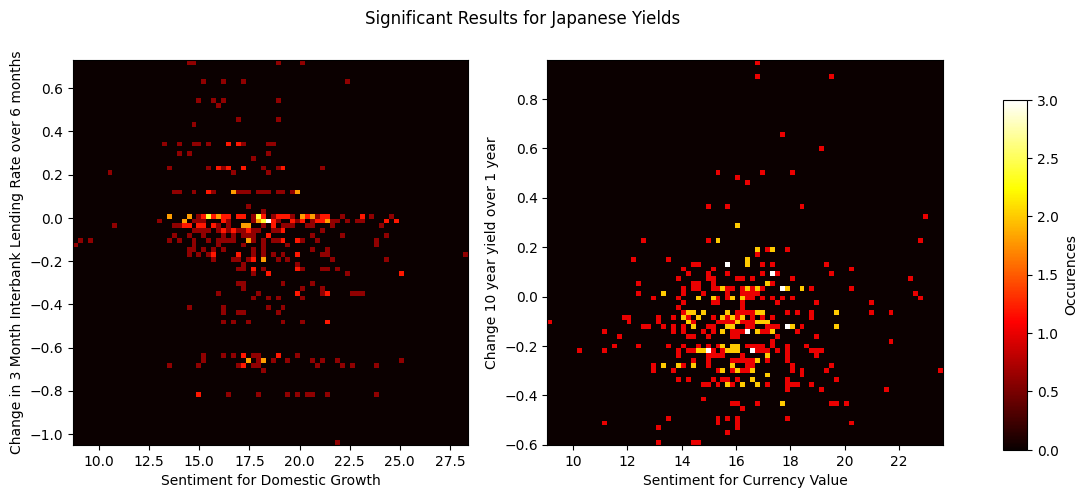

In [126]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((12,5))
fig.suptitle("Significant Results for Japanese Yields")
cax = fig.add_axes([0.9,0.10,0.02,0.7])
axs[0].set_facecolor('black')
axs[0].hist2d(japan['Domestic Growth'],japan['six_month_3m_ib'],  cmap='hot', bins = 80)

axs[0].set_xlabel("Sentiment for Domestic Growth")
axs[0].set_ylabel("Change in 3 Month Interbank Lending Rate over 6 months")
a =axs[1].hist2d( japan['Value of Currency'],japan['twelve_month_10y'], cmap = 'hot', bins=80)
axs[1].set_xlabel("Sentiment for Currency Value")
axs[1].set_ylabel("Change 10 year yield over 1 year")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label='Occurences')

In [127]:
aus = dfs[0]
x = aus.iloc[:,0:4]
x = sm.add_constant(x)
y = aus.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = aus[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col([regs[3], regs[8]],stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =[y.columns.to_list()[3], y.columns[8]]).as_latex())


\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lll}
\hline
                  & twelve\_month\_10y & twelve\_month\_3m\_ib  \\
\hline
const             & 0.2236570          & 0.0076318              \\
                  & (0.2463239)        & (0.3300548)            \\
Inflation         & -0.0141258         & -0.0241290             \\
                  & (0.0116351)        & (0.0155901)            \\
Domestic Growth   & -0.0119478         & -0.0070441             \\
                  & (0.0097241)        & (0.0130295)            \\
Trade Balance     & 0.0042990          & 0.0298450**            \\
                  & (0.0102347)        & (0.0137137)            \\
Value of Currency & 0.0048848          & -0.0075695             \\
                  & (0.0078201)        & (0.0104783)            \\
R-squared         & 0.0145752          & 0.0263738              \\
R-squared Adj.    & -0.0010047         & 0.0109805              \\
N                 & 258                & 258 

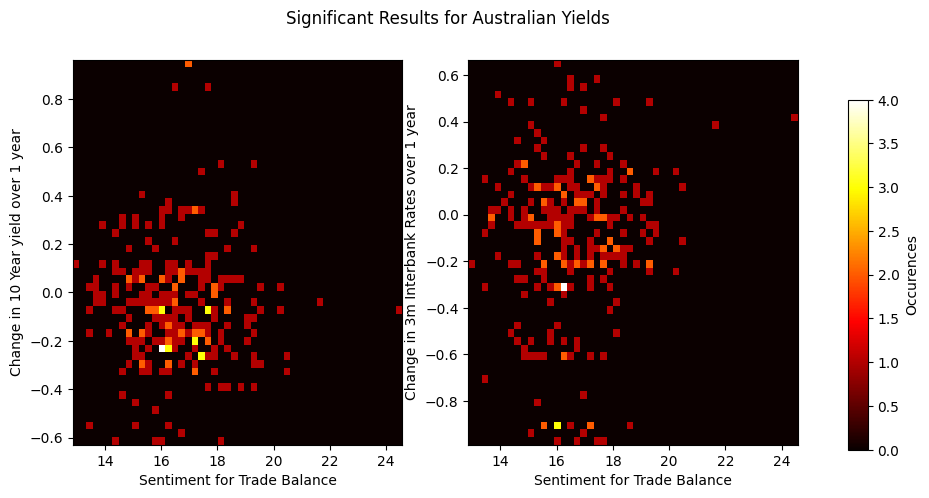

In [128]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.suptitle("Significant Results for Australian Yields")
axs[0].hist2d(aus['Trade Balance'],aus['twelve_month_10y'],  cmap='hot', bins = 50)
axs[0].set_xlabel("Sentiment for Trade Balance")
axs[0].set_ylabel("Change in 10 Year yield over 1 year")
a=axs[1].hist2d( aus['Trade Balance'],aus['twelve_month_3m_ib'], cmap='hot', bins=50)
axs[1].set_xlabel("Sentiment for Trade Balance")
axs[1].set_ylabel("Change in 3m Interbank Rates over 1 year")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label = 'Occurences')

In [129]:
swiss = dfs[4]
x = swiss.iloc[:,0:4]
x = sm.add_constant(x)
y = swiss.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = swiss[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col(regs,stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =y.columns.to_list(),).as_latex())


\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{llllllllll}
\hline
                  & one\_month\_10y & three\_month\_10y & six\_month\_10y & twelve\_month\_10y & one\_month\_3m\_ib & two\_month\_3m\_ib & three\_month\_3m\_ib & six\_month\_3m\_ib & twelve\_month\_3m\_ib  \\
\hline
const             & -0.1946884      & -0.1190749        & 0.0558211       & 0.0721394          & -0.1287517         & -0.1557182         & -0.2206583           & -0.5582418         & -0.7306486             \\
                  & (0.1741453)     & (0.2260139)       & (0.3330467)     & (0.3700322)        & (0.1826305)        & (0.2584139)        & (0.2995627)          & (0.5386913)        & (0.5418381)            \\
Inflation         & -0.0081340      & -0.0099183        & 0.0049745       & 0.0211885          & -0.0016675         & -0.0026628         & -0.0072706           & 0.0242517          & 0.0194376              \\
                  & (0.0078266)     & (0.0101577)       & (0.0149681)    

In [130]:
euro = dfs[5]
x = euro.iloc[:,0:4]
x = sm.add_constant(x)
y = euro.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = euro[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col(regs,stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =y.columns.to_list(),))



                  one_month_10y three_month_10y six_month_10y twelve_month_10y one_month_3m_ib two_month_3m_ib three_month_3m_ib six_month_3m_ib twelve_month_3m_ib
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const             0.0185158     0.0249602       0.0280333     -0.1865544**     -0.0655831***   -0.1277129***   -0.1890896***     -0.3045291***   -0.5823020***     
                  (0.0302694)   (0.0558564)     (0.0717316)   (0.0876250)      (0.0227208)     (0.0389455)     (0.0524508)       (0.0863772)     (0.1324104)       
Inflation         -0.0019474    -0.0016596      -0.0040091    -0.0098906**     0.0009951       0.0032074*      0.0041064*        0.0073021*      0.0141722**       
                  (0.0013520)   (0.0024949)     (0.0032040)   (0.0039139)      (0.0010149)     (0.0017396)     (0.0023428)       (0.0038582)     (0.0059143)       
Domestic Growth

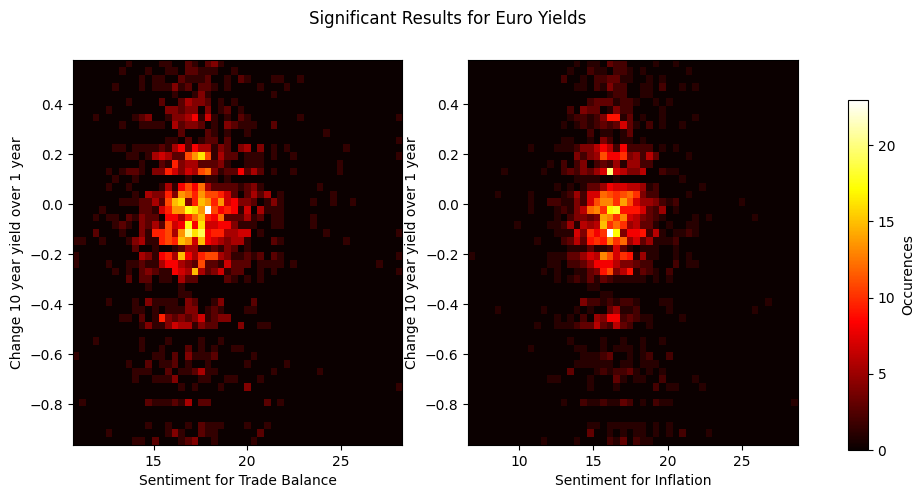

In [131]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.suptitle("Significant Results for Euro Yields")
axs[0].hist2d(euro['Trade Balance'],euro['twelve_month_10y'],  cmap='hot', bins=50)
axs[0].set_xlabel("Sentiment for Trade Balance")
axs[0].set_ylabel("Change 10 year yield over 1 year")
a = axs[1].hist2d( euro['Inflation'],euro['twelve_month_10y'], bins = 50, cmap = 'hot')
axs[1].set_xlabel("Sentiment for Inflation")
axs[1].set_ylabel("Change 10 year yield over 1 year")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label='Occurences')

In [132]:
can = dfs[6]
x = can.iloc[:,0:4]
x = sm.add_constant(x)
y = can.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = can[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col(regs,stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =y.columns.to_list(),))



                  one_month_10y three_month_10y six_month_10y twelve_month_10y one_month_3m_ib two_month_3m_ib three_month_3m_ib six_month_3m_ib twelve_month_3m_ib
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const             -0.0073615    -0.0018473      -0.1081436    -0.2135905       0.0250114       -0.0014069      -0.0346567        -0.1679501      -0.0349284        
                  (0.0404539)   (0.0831900)     (0.0997673)   (0.1498919)      (0.0597847)     (0.0913912)     (0.1150787)       (0.1617558)     (0.2418888)       
Inflation         0.0029710*    0.0020068       0.0038012     0.0142054**      -0.0028810      -0.0029185      -0.0047587        -0.0042190      -0.0047346        
                  (0.0017790)   (0.0036584)     (0.0043874)   (0.0065917)      (0.0026291)     (0.0040191)     (0.0050607)       (0.0071134)     (0.0106374)       
Domestic Growth

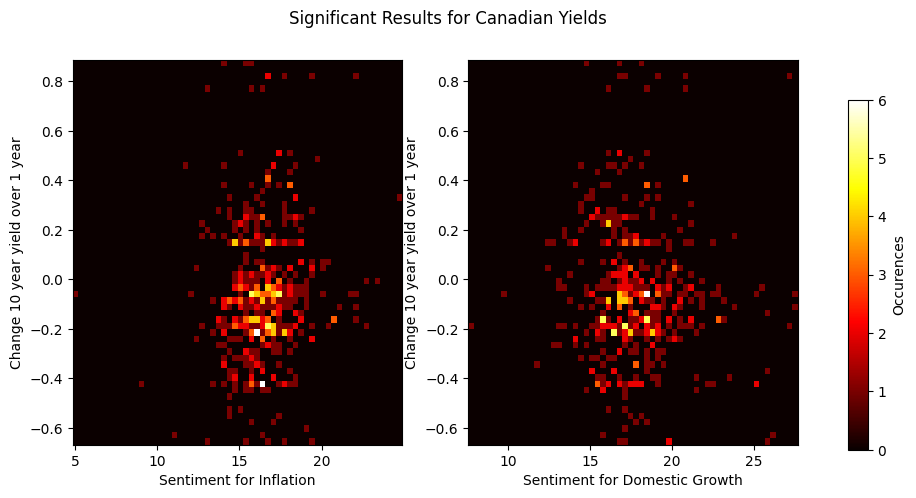

In [133]:
# Number of bins 
bin_num = 60

fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
fig.suptitle("Significant Results for Canadian Yields")
cax = fig.add_axes([0.9,0.10,0.02,0.7])
axs[0].hist2d(can['Inflation'],can['twelve_month_10y'], cmap= 'hot', bins=bin_num)
axs[0].set_xlabel("Sentiment for Inflation")
axs[0].set_ylabel("Change 10 year yield over 1 year")
a =axs[1].hist2d( can['Domestic Growth'],can['twelve_month_10y'], cmap='hot', bins= bin_num)
axs[1].set_xlabel("Sentiment for Domestic Growth")
axs[1].set_ylabel("Change 10 year yield over 1 year")

fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label = "Occurences")

In [134]:
swed = dfs[6]
x = swed.iloc[:,0:4]
x = sm.add_constant(x)
y = swed.iloc[:, 6:]
regs = []
for i in range(0, len(y.columns)):
    yvar = swed[y.columns[i]]
    model = sm.OLS(yvar,x)
    res = model.fit()
    regs.append(res)

print(summary_col(regs,stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =y.columns.to_list(),))


                  one_month_10y three_month_10y six_month_10y twelve_month_10y one_month_3m_ib two_month_3m_ib three_month_3m_ib six_month_3m_ib twelve_month_3m_ib
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const             -0.0073615    -0.0018473      -0.1081436    -0.2135905       0.0250114       -0.0014069      -0.0346567        -0.1679501      -0.0349284        
                  (0.0404539)   (0.0831900)     (0.0997673)   (0.1498919)      (0.0597847)     (0.0913912)     (0.1150787)       (0.1617558)     (0.2418888)       
Inflation         0.0029710*    0.0020068       0.0038012     0.0142054**      -0.0028810      -0.0029185      -0.0047587        -0.0042190      -0.0047346        
                  (0.0017790)   (0.0036584)     (0.0043874)   (0.0065917)      (0.0026291)     (0.0040191)     (0.0050607)       (0.0071134)     (0.0106374)       
Domestic Growth

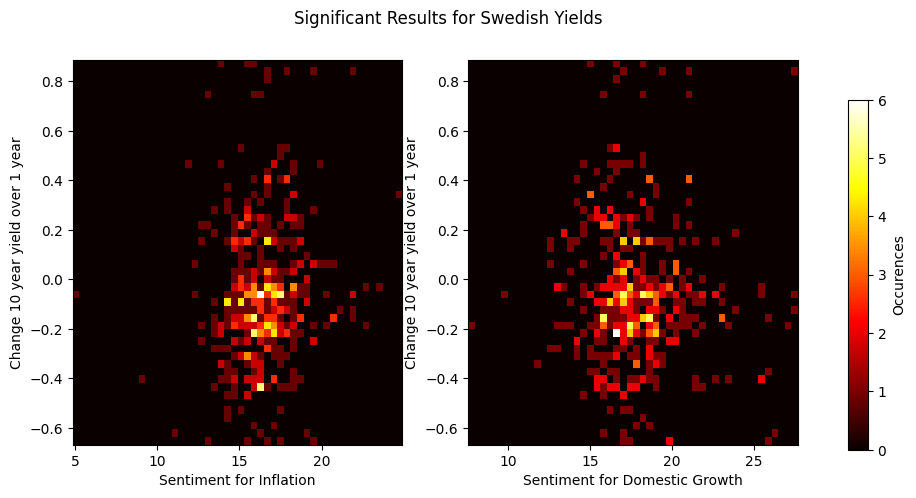

In [135]:
# num bins 
bin_num = 50 

fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.suptitle("Significant Results for Swedish Yields")
axs[0].hist2d(swed['Inflation'],swed['twelve_month_10y'],  cmap='hot', bins=bin_num )
axs[0].set_xlabel("Sentiment for Inflation")
axs[0].set_ylabel("Change 10 year yield over 1 year")
a= axs[1].hist2d( swed['Domestic Growth'],swed['twelve_month_10y'], cmap='hot', bins=bin_num)
axs[1].set_xlabel("Sentiment for Domestic Growth")
axs[1].set_ylabel("Change 10 year yield over 1 year")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label='Occurences')

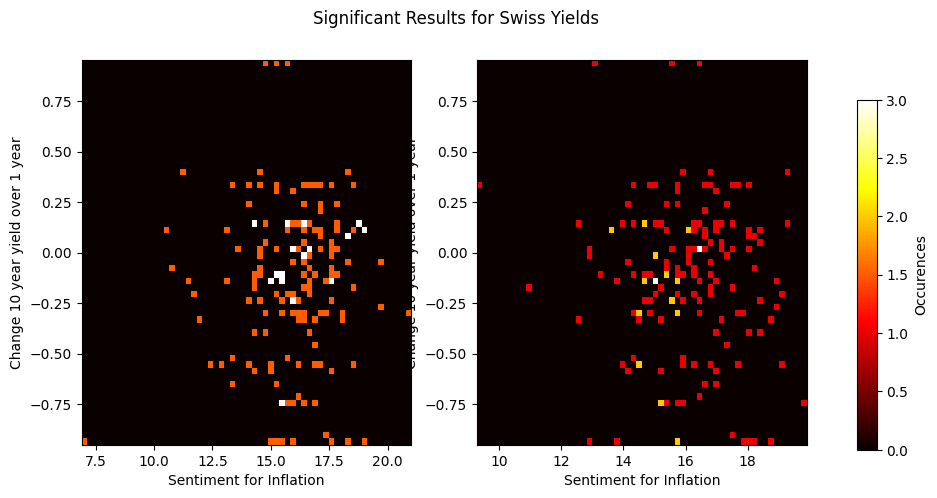

In [136]:
# Num bins 
bin_num = 60
fig, axs = plt.subplots(1,2)
fig.set_size_inches((10,5))
cax = fig.add_axes([0.9,0.10,0.02,0.7])
fig.suptitle("Significant Results for Swiss Yields")
axs[0].hist2d(swiss['Inflation'],swiss['twelve_month_10y'], cmap = 'hot',bins= bin_num)
axs[0].set_xlabel("Sentiment for Inflation")
axs[0].set_ylabel("Change 10 year yield over 1 year")
a = axs[1].hist2d( swiss['Value of Currency'],swiss['twelve_month_10y'], cmap='hot', bins=bin_num)
axs[1].set_xlabel("Sentiment for Inflation")
axs[1].set_ylabel("Change 10 year yield over 1 year")
fig.subplots_adjust(right=0.85)
fig.colorbar(a[3], cax, label = 'Occurences')

In [137]:
pca = PCA(n_components=4)
pca.fit(data.iloc[:,0:4])
pca.transform(data.iloc[:,0:4])

datanew = data.copy(deep=True)
datanew.iloc[:,0:4] = pca.transform(data.iloc[:,0:4])
datanew = datanew.rename(columns={"Inflation":1, "Domestic Growth":2, 'Trade Balance':3, 'Value of Currency':4})

x  = datanew.iloc[:,0:2]
x = sm.add_constant(x)
y = datanew.iloc[:, 6:]

pca_reg = []
for i in range(len(y.columns.to_list())):
    yvar = datanew[y.columns.to_list()[i]]
    model = sm.OLS(yvar,x)
    pca_reg.append(model.fit())

In [138]:
print(summary_col(pca_reg,stars=True, #Generate and print summary column with regression data 
float_format='%0.7f', info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
 model_names =y.columns.to_list(),))


               one_month_10y three_month_10y six_month_10y twelve_month_10y one_month_3m_ib two_month_3m_ib three_month_3m_ib six_month_3m_ib twelve_month_3m_ib
----------------------------------------------------------------------------------------------------------------------------------------------------------------
const          -0.0063245*** -0.0195021***   -0.0403764*** -0.0781922***    -0.0077661***   -0.0164407***   -0.0238394***     -0.0386908***   -0.0746636***     
               (0.0012992)   (0.0022230)     (0.0028557)   (0.0036129)      (0.0012068)     (0.0020338)     (0.0025742)       (0.0040166)     (0.0056643)       
1              0.0000799     -0.0001257      -0.0003221    0.0002167        0.0012387***    0.0018875***    0.0032874***      0.0046560***    0.0062467***      
               (0.0004569)   (0.0007817)     (0.0010042)   (0.0012705)      (0.0004244)     (0.0007152)     (0.0009052)       (0.0014124)     (0.0019919)       
2              0.0005713     0.00

/Users/prottoyachowdhury/anaconda3/envs/text310/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
/Users/prottoyachowdhury/anaconda3/envs/text310/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
/Users/prottoyachowdhury/anaconda3/envs/text310/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
/Users/prottoyachowdhury/anaconda3/envs/text310/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:524: RuntimeWarning: The values in the array are u

Text(0.5, 0, '3 month IB rates')

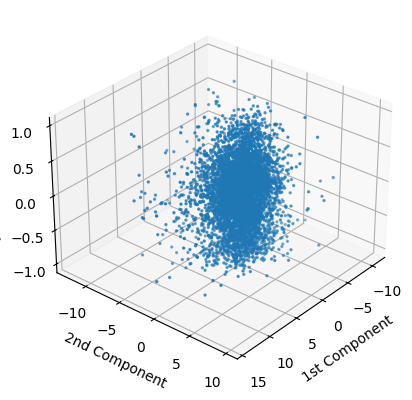

In [139]:
data_new = datanew[datanew['country']=='united states']
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(datanew[1], datanew[2], datanew['twelve_month_3m_ib'],s=2)
ax.view_init(elev=30., azim=40, roll=0)
ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3 month IB rates')
